In [1]:
import pandas as pd

df = pd.read_csv("new_frequencies.txt", sep=" ", names=["word", "freq"])

letters = []

def letterCol(row):
    return str(row["word"])[0]

def f(row):
    return str(row["word"])[0] == "a" and row["freq"] < 10000

df[df.apply(f, axis=1)]["freq"].mean()

df["letter"] = df.apply(letterCol, axis=1)



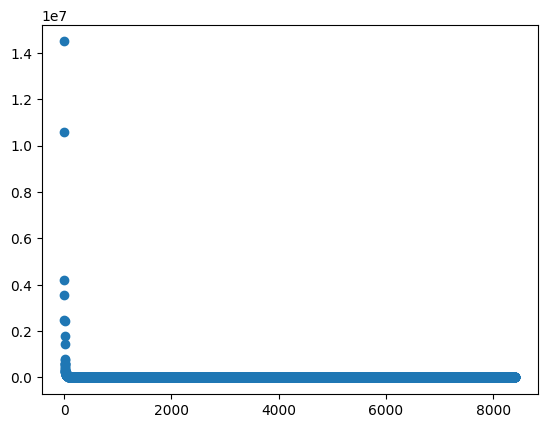

In [89]:
import matplotlib.pyplot as plt

a = df[df["letter"] == "a"]

# a = a[a["freq"] < 1000]

print(a[a["freq"] < 1000]["freq"].mean())

# plt.hist(a[a["freq"] < 1000]["freq"], bins=100)

plt.scatter(range(len(a["freq"])), a["freq"])

# plt.hist(a["freq"], bins=10)

(0.0, 100.0)

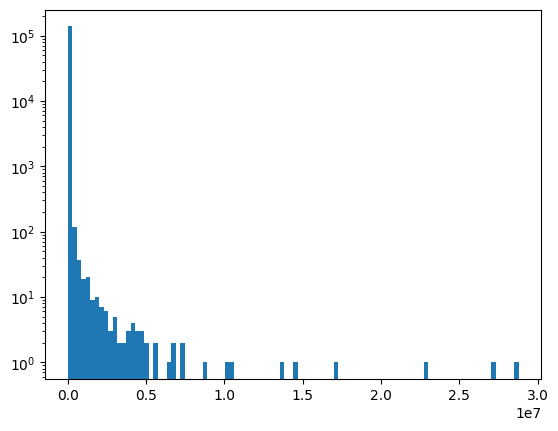

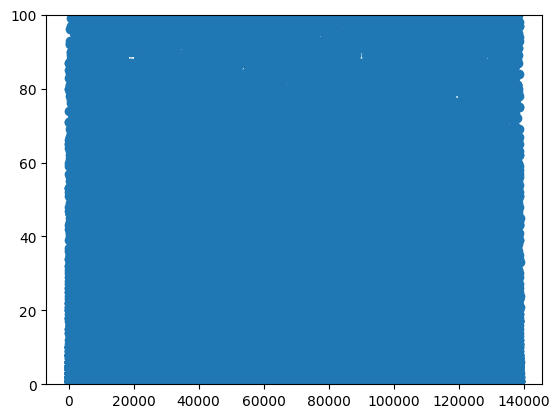

In [70]:
sampled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

fig, ax = plt.subplots()

ax.hist(sampled_df["freq"], bins=100, log=True)
# ax.set_ylim(0, 100)
# ax.set_xlim(0, 10000000)


fig, ax = plt.subplots()

ax.scatter(range(len(sampled_df["word"])), sampled_df["freq"])
ax.set_ylim(0, 100)


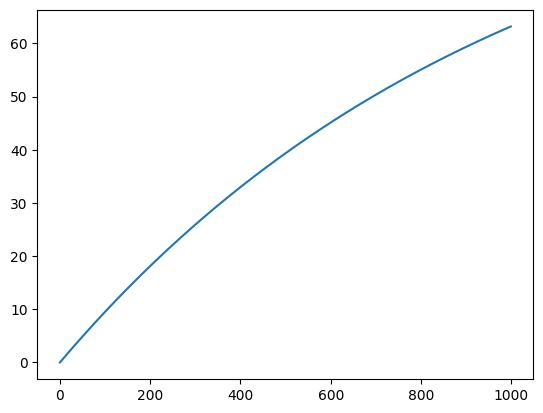

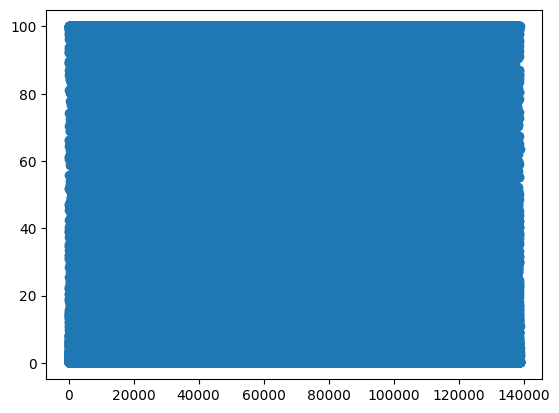

In [96]:

import numpy as np

def fit(data, height=100, ease=1):
    return height*(1.0-np.exp(-ease*pow(data, 1)))

fig, ax = plt.subplots()

ax.plot(np.arange(0, 1000), fit(np.arange(0, 1000), height=100, ease=1/1000))

score = fit(sampled_df["freq"], height=100, ease=1/1000)

fig, ax = plt.subplots()

# ax.hist(score, bins=50)
ax.scatter(range(len(sampled_df["word"])), score)

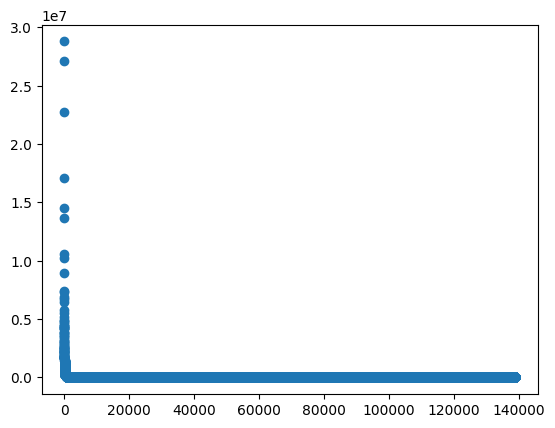

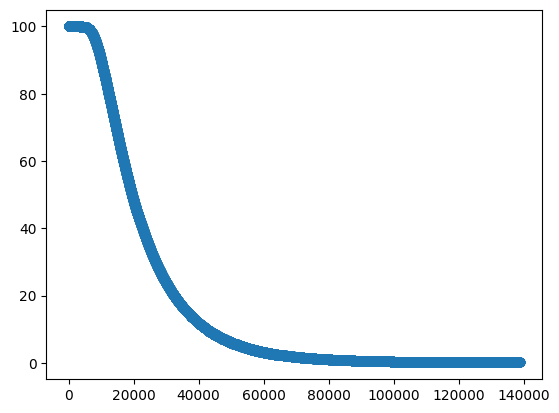

In [97]:
fig, ax = plt.subplots()

ax.scatter(range(0, len(df["word"])), df["freq"])

fig, ax = plt.subplots()

score = fit(df["freq"], height=100, ease=1/1000)

ax.scatter(range(0, len(df["word"])), score)

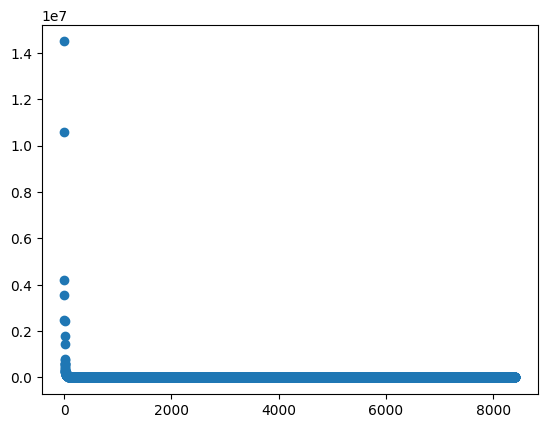

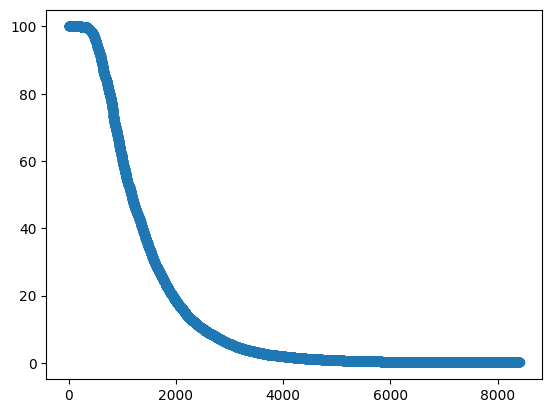

In [98]:
fig, ax = plt.subplots()

ax.scatter(range(0, len(a["word"])), a["freq"])

fig, ax = plt.subplots()

score = fit(a["freq"], height=100, ease=1/1000)

ax.scatter(range(0, len(a["word"])), score)